# Ice Out Dates

Records of 'ice-out' and 'ice-in' days on selected Minnesota lakes are available from the Minnesota DNR at their web site [Ice Out Dates](http://www.dnr.state.mn.us/ice_out/index.html). The customs for determining ice-out and ice-in vary from lake to lake, so it's difficult to compare across different lakes. The DNR does attempt to use the same observers and criteria for each lake, so the longitudinal data series does provide interesting insights.

## Initialization

### Load Python Modules

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Module to enhance matplotlib plotting
import seaborn
seaborn.set()

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Styles
from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

In [2]:
# Directory where data files are stored
dir = "./data/"

## Rainy Lake

,source,comments
ice out date,,
1930-05-03,MNDNR-SCO,NaN
1931-05-05,MNDNR-SCO,NaN
1932-05-07,MNDNR-SCO,NaN
1933-05-06,MNDNR-SCO,NaN
1934-05-06,MNDNR-SCO,NaN


,source,comments
ice out date,,
2011-05-02,MNDNR-SCO,NaN
2012-04-06,MNDNR-SCO,NaN
2013-05-16,MNDNR-SCO,NaN
2014-05-20,MNDNR-SCO,International Falls Journal
2015-04-28,MNDNR-SCO,NaN



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         114
Number of Degrees of Freedom:   2

R-squared:         0.0582
Adj R-squared:     0.0498

Rmse:              8.3439

F-stat (1, 112):     6.9257, p-value:     0.0097

Degrees of Freedom: model 1, resid 112

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0770     0.0292      -2.63     0.0097    -0.1343    -0.0196
     intercept   126.9687     1.6808      75.54     0.0000   123.6744   130.2631
---------------------------------End of Summary---------------------------------

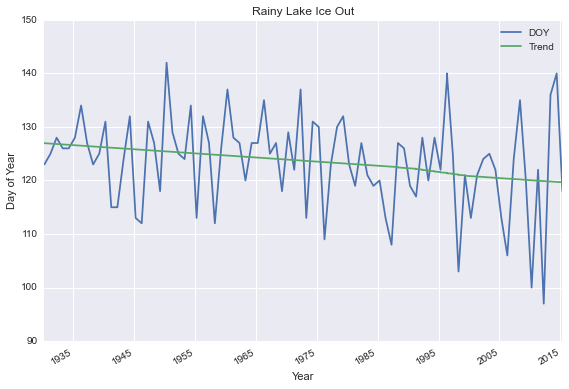

In [3]:
# Read .csv file
RL_ICEOUT = pd.read_csv(dir + 'IceOut_RL.txt',index_col=0,parse_dates=True,skiprows=1);
display(RL_ICEOUT.head())
display(RL_ICEOUT.tail())

# Determine Trend Line
RL_ICEOUT['DOY'] = RL_ICEOUT.index.dayofyear
RL_ICEOUT['n'] = pd.Series(range(0, len(RL_ICEOUT)), index=RL_ICEOUT.index)
RL_model = pd.ols(x = RL_ICEOUT['n'], y = pd.Series(RL_ICEOUT['DOY']), intercept=True)
display(RL_model)

# Plot results
RL_ICEOUT['Trend'] = RL_model.beta['x']*RL_ICEOUT['n'] + RL_model.beta['intercept']
RL_ICEOUT[['DOY','Trend']].plot()
plt.title('Rainy Lake Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')

rl = plt.gca()

plt.tight_layout()

fname = './images/IceOut_RL.png'

plt.savefig(fname)
!convert $fname -trim $fname

The relatively long data series for Rainy Lake provides a statistically signficant trend line. The ice-out day is consistently getting earlier and, at the some time, becoming more variable. Thus in the last few years, Rainy Lake has set earliest ice-out records and nearly broken lastest ice-out records.

## Kabetogoma Lake

,source,comments
ice out date,,
1984-04-24,MNDNR-SCO,NaN
1988-05-01,MNDNR-SCO,NaN
1988-05-01,MNDNR-LAKESDB,Climatology Ice-Out Book statistics
1989-05-05,MNDNR-SCO,NaN
1989-05-05,MNDNR-LAKESDB,Climatology Ice-Out Book statistics


,source,comments
ice out date,,
2011-04-30,MNDNR-SCO,NaN
2012-04-01,MNDNR-SCO,NaN
2013-05-15,MNDNR-SCO,NaN
2014-05-14,MNDNR-SCO,National Park Ranger Pilot
2015-04-17,MNDNR-SCO,local paper and DNR Fisheries



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         61
Number of Degrees of Freedom:   2

R-squared:         0.0549
Adj R-squared:     0.0389

Rmse:              9.5870

F-stat (1, 59):     3.4278, p-value:     0.0691

Degrees of Freedom: model 1, resid 59

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.2182     0.1179      -1.85     0.0691    -0.4492     0.0128
     intercept   122.2114     2.2793      53.62     0.0000   117.7440   126.6788
---------------------------------End of Summary---------------------------------

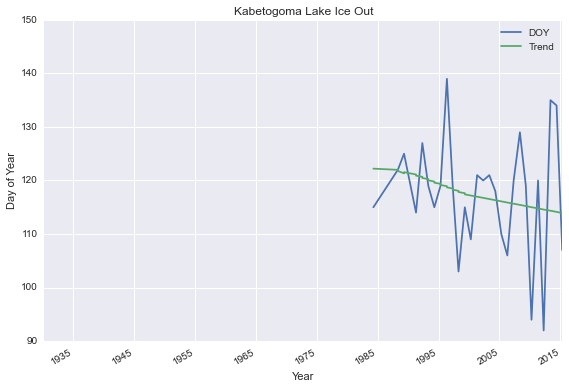

In [4]:
# Read .csv file
KL_ICEOUT = pd.read_csv(dir + 'IceOut_KL.txt',index_col=0,parse_dates=True,skiprows=1);
display(KL_ICEOUT.head())
display(KL_ICEOUT.tail())

# Determine Trend Line
KL_ICEOUT['DOY'] = KL_ICEOUT.index.dayofyear
KL_ICEOUT['n'] = pd.Series(range(0, len(KL_ICEOUT)), index=KL_ICEOUT.index)
KL_model = pd.ols(x = KL_ICEOUT['n'], y = pd.Series(KL_ICEOUT['DOY']), intercept=True)
display(KL_model)

# Plot results
KL_ICEOUT['Trend'] = KL_model.beta['x']*KL_ICEOUT['n'] + KL_model.beta['intercept']
KL_ICEOUT[['DOY','Trend']].plot()
plt.title('Kabetogoma Lake Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')
plt.axis(rl.axis())

plt.tight_layout()

fname = './images/IceOut_KL.png'

plt.savefig(fname)
!convert $fname -trim $fname

In [5]:
rl.axis()

(704675.0, 735716.0, 90.0, 150.0)

## Lake of the Woods

,source,comments
ice out date,,
1985-05-02,MNDNR-SCO,NaN
1988-05-03,MNDNR-LAKESDB,Climatology Ice-Out Book statistics
1988-05-03,MNDNR-SCO,NaN
1989-05-05,MNDNR-LAKESDB,Climatology Ice-Out Book statistics
1989-05-05,MNDNR-SCO,NaN


,source,comments
ice out date,,
2011-05-05,MNDNR-SCO,NaN
2012-04-08,MNDNR-SCO,NaN
2013-05-15,MNDNR-SCO,NaN
2014-05-21,MNDNR-SCO,Lake of the Woods Ice Patrol
2015-04-30,MNDNR-SCO,satellite and various web cams



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         60
Number of Degrees of Freedom:   2

R-squared:         0.0012
Adj R-squared:    -0.0160

Rmse:              9.2346

F-stat (1, 58):     0.0717, p-value:     0.7899

Degrees of Freedom: model 1, resid 58

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0304     0.1135       0.27     0.7899    -0.1921     0.2529
     intercept   120.2213     2.2013      54.61     0.0000   115.9068   124.5357
---------------------------------End of Summary---------------------------------

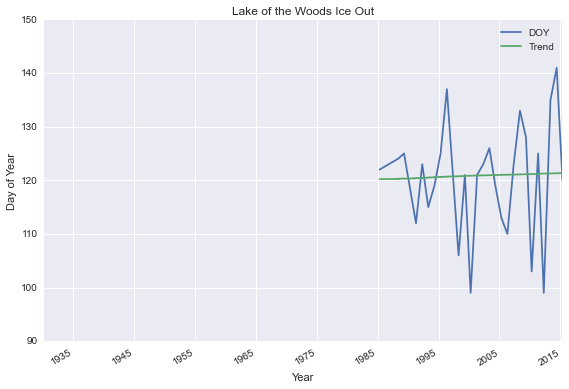

In [6]:
# Read .csv file
LOW_ICEOUT = pd.read_csv(dir + 'IceOut_LOW.txt',index_col=0,parse_dates=True,skiprows=1);
display(LOW_ICEOUT.head())
display(LOW_ICEOUT.tail())

# Determine Trend Line
LOW_ICEOUT['DOY'] = LOW_ICEOUT.index.dayofyear
LOW_ICEOUT['n'] = pd.Series(range(0, len(LOW_ICEOUT)), index=LOW_ICEOUT.index)
LOW_model = pd.ols(x = LOW_ICEOUT['n'], y = pd.Series(LOW_ICEOUT['DOY']), intercept=True)
display(LOW_model)

# Plot results
LOW_ICEOUT['Trend'] = LOW_model.beta['x']*LOW_ICEOUT['n'] + LOW_model.beta['intercept']
LOW_ICEOUT[['DOY','Trend']].plot()
plt.title('Lake of the Woods Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')
plt.axis(rl.axis())

plt.tight_layout()

fname = './images/IceOut_LOW.png'

plt.savefig(fname)
!convert $fname -trim $fname